# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
!pip install citipy

  Created wheel for citipy: filename=citipy-0.0.5-cp37-none-any.whl size=559708 sha256=c23920ebc408dc793e9fc0c137fb2f5aef036507d4abca092395623c1aa6c1c9
  Stored in directory: C:\Users\barbaraysl\AppData\Local\pip\Cache\wheels\6f\07\0d\0392639cf1c10376f59decd06775c0e085ca2458c6036c1028
Successfully built citipy


In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [45]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
type(cities)
# print(cities)


list

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [46]:
import requests
import json
from pprint import pprint
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build partial query URL
query_url = f"{url}appid={api_key}&q="


In [54]:
# list for response results
Lng = []
Lat = []
Cloudiness = []
Humidity = []
Max_Temp = []
Wind_Speed = []
Country = []
City = []


# loop through cities, make API request, and append desired results
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        print(f"Processing Record| for {city}")
        Lng.append(response['coord']['lon'])
        Lat.append(response['coord']['lat'])
        Cloudiness.append(response['clouds']['all'])
        Humidity.append(response['main']['humidity'])
        Max_Temp.append(response['main']['temp_max'])
        Wind_Speed.append(response['wind']['speed'])
        Country.append(response['sys']['country'])
        City.append(response['name'])
    except KeyError:
        print(f'{city} not found')



Processing Record| for laguna
Processing Record| for canton
Processing Record| for punta arenas
Processing Record| for bhola
Processing Record| for port alfred
Processing Record| for jamestown
Processing Record| for illoqqortoormiut
illoqqortoormiut not found
Processing Record| for hilo
Processing Record| for dikson
Processing Record| for bredasdorp
Processing Record| for puerto ayora
Processing Record| for gizo
Processing Record| for nikolskoye
Processing Record| for taolanaro
taolanaro not found
Processing Record| for santa fe
Processing Record| for kjollefjord
Processing Record| for sochi
Processing Record| for buraydah
Processing Record| for tabiauea
tabiauea not found
Processing Record| for leningradskiy
Processing Record| for sentyabrskiy
sentyabrskiy not found
Processing Record| for sitka
Processing Record| for saint george
Processing Record| for sahuaripa
Processing Record| for furmanov
Processing Record| for butaritari
Processing Record| for ancud
Processing Record| for shu
Pr

Processing Record| for yar-sale
Processing Record| for flinders
Processing Record| for tuatapere
Processing Record| for mende
Processing Record| for lakeside
Processing Record| for marsh harbour
Processing Record| for thompson
Processing Record| for benjamin constant
Processing Record| for kruisfontein
Processing Record| for kudahuvadhoo
Processing Record| for maniitsoq
Processing Record| for abyek
Processing Record| for zachagansk
zachagansk not found
Processing Record| for bathsheba
Processing Record| for ilulissat
Processing Record| for itaberai
Processing Record| for lomovka
Processing Record| for imeni poliny osipenko
Processing Record| for lamar
Processing Record| for namibe
Processing Record| for abha
Processing Record| for la ronge
Processing Record| for datong
Processing Record| for baiyin
Processing Record| for le port
Processing Record| for guerrero negro
Processing Record| for nakhon ratchasima
Processing Record| for floro
Processing Record| for khonuu
khonuu not found
Proc

Processing Record| for vigia del fuerte
Processing Record| for san jose
Processing Record| for qujing
Processing Record| for kang
Processing Record| for gondar
Processing Record| for coquimbo
Processing Record| for comodoro rivadavia
Processing Record| for mutsu
Processing Record| for gueret
Processing Record| for marsa matruh
Processing Record| for sola
Processing Record| for shahr-e babak
Processing Record| for ostersund
Processing Record| for omaruru
Processing Record| for altamira
Processing Record| for dunmore east
Processing Record| for channel-port aux basques
Processing Record| for ternate
Processing Record| for ngukurr
ngukurr not found
Processing Record| for atambua
Processing Record| for petrozavodsk
Processing Record| for galle
Processing Record| for vievis
Processing Record| for quatre cocos
Processing Record| for kisangani
Processing Record| for temaraia
temaraia not found
Processing Record| for tungkang
tungkang not found
Processing Record| for torres
Processing Record| 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [60]:
Weather_dict={
    "City":City,
    "Cloudiness":Cloudiness,
    "Country":Country,
    "Humidity":Humidity,
    "Lat":Lat,
    "Lng":Lng,
    "Max Temp":Max_Temp,
    "Wind Speed":Wind_Speed
}

weather_data = pd.DataFrame(Weather_dict)
weather_data.count()


City          531
Cloudiness    531
Country       531
Humidity      531
Lat           531
Lng           531
Max Temp      531
Wind Speed    531
dtype: int64

In [69]:
weather_data.head(5)

,City,Cloudiness,Country,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Laguna,100,BZ,100,16.17,-88.94,296.15,0.23
1,Canton,90,US,74,40.80,-81.38,276.48,7.20
2,Punta Arenas,100,CL,66,-53.16,-70.91,283.15,5.10
3,bhola,90,PK,100,32.66,73.89,279.15,1.27
4,Port Alfred,77,ZA,83,-33.59,26.89,292.04,3.64


In [70]:
#Export into CSV
weather_data.to_csv("weatherdata.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

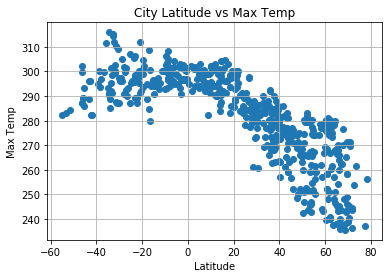

In [62]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temp")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs Max Temp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

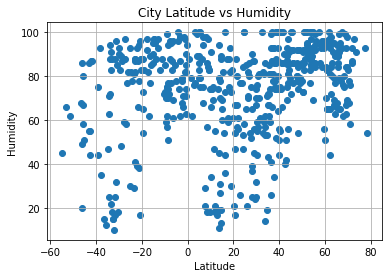

In [66]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

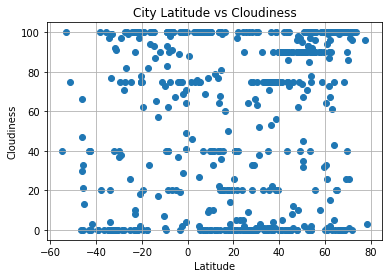

In [67]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

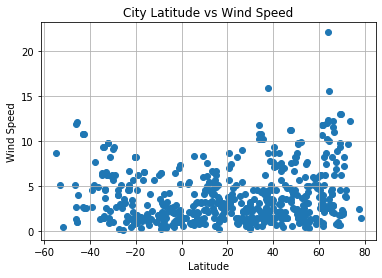

In [68]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs Wind Speed.png")

# Show plot
plt.show()